# Malignant-Comments-Classifier Project 

A Malignant Comments Classifier is a machine learning project that aims to identify and classify harmful or malicious comments automatically. The project typically involves the following steps:

- Data collection: A dataset of labeled comments (i.e., comments that have been manually labeled as either harmful or not harmful) is collected.
- Data preprocessing: The collected dataset is cleaned and preprocessed to prepare it for use in the machine learning model. This can include tasks such as removing stop words, stemming or lemmatization, and vectorization.
- Model training: A machine learning model, such as a neural network or a support vector machine, is trained on the preprocessed dataset.
- Model evaluation: The trained model is evaluated on a separate dataset to measure its performance in identifying harmful comments. Common evaluation metrics include accuracy, precision, recall, and F1 score.
- Model deployment: If the model's performance is satisfactory, it can be deployed in a production environment to automatically classify new comments as they are posted.

It's important to note that, this is a very sensitive topic and collecting and labeling the dataset is a crucial step. Also, the model's performance must be continuously monitored to ensure that it is not producing biased results.

Problem Statement:
   - The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
    - Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
    - There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
    - Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
    - Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
import string
import nltk
from nltk.corpus import  stopwords
import sklearn 
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC 
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("Malignant-Comments-Classifiertrain.cav")

In [3]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
print(df_train.shape)

(159571, 8)


    We have in total 159571 entries and 8 rows in total in the train dataset. 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df_train.isnull()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
159566,False,False,False,False,False,False,False,False
159567,False,False,False,False,False,False,False,False
159568,False,False,False,False,False,False,False,False
159569,False,False,False,False,False,False,False,False


Remarks: 
   - There are 8 features out of which 2 are of object type and 6 are of int type.
   - Non-null count shows, no null values are present in dataset, it is perfect to go further.

In [7]:
#checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = df_train.columns[2:]

#counting non-zero rows i.e Malignant Comments
malignant_comments = len(df_train[df_train[output_labels].any(axis=1)])

#counting rows containing zero i.e., Normal Comments
normal_comments = len(df_train)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(df_train),2)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(df_train),2)}%)")

Total Malignant Comments: 16225 (10.17%)
Total Normal Comments: 143346 (89.83%)


In [8]:
#Checking the length of comments and storing it into another column 'original_length'
#copying df_train into another object
df = df_train.copy()
df['original_length'] = df.comment_text.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


### Data Cleaning: 

In [9]:
#importing NLTK libraries
import nltk
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [10]:
#since the feature 'id' has no relevance w.r.t. model training therefore dropping this feature
df.drop(columns=['id'],inplace=True)

In [11]:
#converting comment text to lowercase
df['comment_text'] = df.comment_text.str.lower()
#interpreting first 5 rows
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [12]:
#Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ')
#Keep only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc.
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [13]:
#Getting the list of stop words of english language as set
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
#Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us","ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve","rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)
#Interpreting stop words
print(stop_words)

{'lmk', 'hers', 'us', 'those', 'haven', 'who', 'off', 'being', "wasn't", "isn't", 'also', 'maybe', "she'll", 'oh', 'were', 'p', 'is', 'ourselves', 'does', 'theirs', 'for', 'most', 'was', 'above', "i'm", "you've", 'only', 'about', 'after', 'are', 'if', 'myself', "didn't", 'yourself', 'smh', "weren't", 'wouldn', 'they', 'there', 'isn', 'the', 'wasn', 'his', 'before', 'g', 'r', 'had', 'out', 'ain', "you'd", 'same', "d'aww", "couldn't", 'omg', "that'll", 'because', 'aren', 'j', 'it', 'l', 'you', 'shouldn', 'itself', 'why', 'themselves', 'our', 'whom', 'won', 'x', "i've", "can't", 'been', "mustn't", 'its', 'didn', "mightn't", 'hi', 'ikr', 'from', 'below', 's', "doesn't", 'weren', 'ily', 'has', 'or', 'nt', 'll', 'lol', 'be', 'than', 'any', 'don', 'him', "hasn't", "shouldn't", 'just', 'them', 'hadn', 'how', 'yolo', 'nvm', 'further', 'against', 'between', 'can', 'here', 'umm', 'each', "hadn't", 'i', 'lmfao', 'm', 'n', 'doesn', 'an', 'c', 'herself', 'at', 'nor', 'ok', 'while', 'some', 'needn', 

In [15]:
#Removing stop words
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

In [16]:
#Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")

In [17]:
#Interpreting any 10 random rows to see change
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
25862,naval jack united states svg px usn jack ship ...,0,0,0,0,0,0,574
7132,someone straighten sentence line reads additio...,0,0,0,0,0,0,281
108608,busy arrow currently swamped try work whenever...,0,0,0,0,0,0,97
91922,franklins saying arranged subject sonds reason...,0,0,0,0,0,0,114
59987,queue quick heads see moved prep area queue kn...,0,0,0,0,0,0,238
133065,blow ass stupid piece shit,1,0,1,0,1,0,61
148953,times atlas world history suggests picture end...,0,0,0,0,0,0,308
28262,world statement worthy two day block treasuryt...,0,0,0,0,0,0,222
98475,nationalists websites decision polish court wi...,0,0,0,0,0,0,383
103968,thanks notice keep eye regards,0,0,0,0,0,0,55


### Performing Stemming: 

In [18]:
nltk.download('punkt')
snb_stem = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
df.sample(20)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
140440,unfortun two review newest one avail trace ami...,0,0,0,0,0,0,489
155984,biograph inform sf chronicl someon would like ...,0,0,0,0,0,0,103
100435,result three revert rule violat time report pr...,0,0,0,0,0,0,209
98665,issu powerpoint two fold first tri figur exact...,0,0,0,0,0,0,958
50764,mirv think anyon made claim hand insist pov ed...,0,0,0,0,0,0,2066
76815,even unless rumor turn document fact attest re...,0,0,0,0,0,0,150
140256,user communist fyi april fool joke someon remo...,0,0,0,0,0,0,379
59449,word origin origin word barsoom can not logic ...,0,0,0,0,0,0,191
9624,give shiit dis like,1,0,0,0,0,0,50
128673,ps cs crash comput toshiba va vista ps cs inte...,0,0,0,0,0,0,176


In [20]:
#Checking the length of comment_text after cleaning and storing it in clean_length variable
df["clean_length"] = df.comment_text.str.len()
#Interpreting first 5 rows
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,clean_length
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,264,135
1,match background colour seem stuck thank talk ...,0,0,0,0,0,0,112,57
2,man realli tri edit war guy constant remov rel...,0,0,0,0,0,0,233,112
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,622,310
4,sir hero chanc rememb page,0,0,0,0,0,0,67,26


In [21]:
#checking the % of length cleaned
print(f"Total Original Length: {df.original_length.sum()}")
print(f"Total Cleaned Length : {df.clean_length.sum()}")
print(f"% of Length Cleaned  : {(df.original_length.sum()-df.clean_length.sum())*100/df.original_length.sum()}%")

Total Original Length: 62995074
Total Cleaned Length : 34297499
% of Length Cleaned  : 45.55526833733063%


### Performing Exploratory Data Analysis Now: 

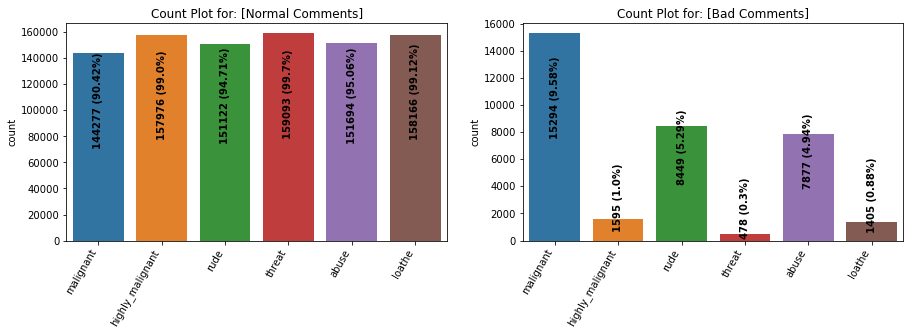

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
for i in range(2):
    sns.countplot(data=df[output_labels][df[output_labels]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for: [Normal Comments]")
    else:
        ax[i].set_title("Count Plot for: [Bad Comments]")
        
    ax[i].set_xticklabels(output_labels,rotation=60, ha="right")

    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1

plt.show()

Remarks:
- Dataset consists of higher number of Normal Comments than Bad or Malignant Comments. Therefore, it is clear that dataset is imbalanced and needs to be handle accordingly.
- Most of the bad comments are of type malignant while least number of type threat is present in dataset.
- Majority of bad comments are of type malignant, rude and abuse.

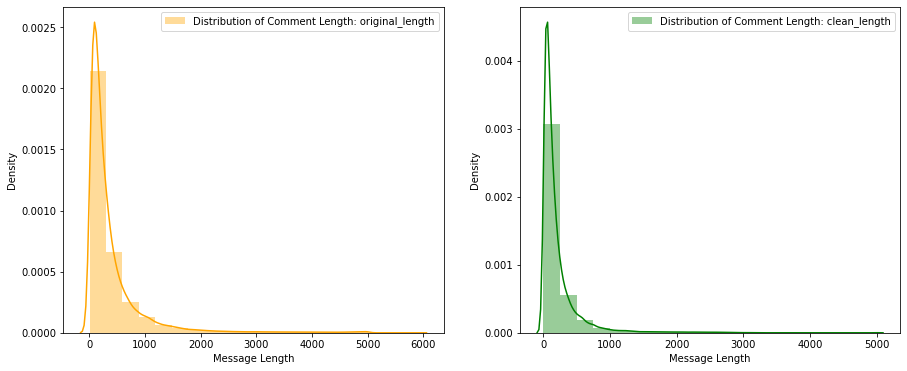

In [23]:
#Comparing the comment text length distribution before cleaning and after cleaning
fig, ax = plt.subplots(1,2,figsize=(15,6))
j=0
colors = ['orange','green']
for i in df.columns[-2:]:
    label_text = f"Distribution of Comment Length: {i}"
    sns.distplot(df[i],ax=ax[j],bins=20,color=colors[j],label=label_text)
    ax[j].set_xlabel("Message Length")
    ax[j].legend()
    j += 1
    
plt.show()

### WordCloud: Getting sense of loud words in each of the output labels.

In [24]:
pip install wordcloud

In [25]:
#importing required libraries
from wordcloud import WordCloud

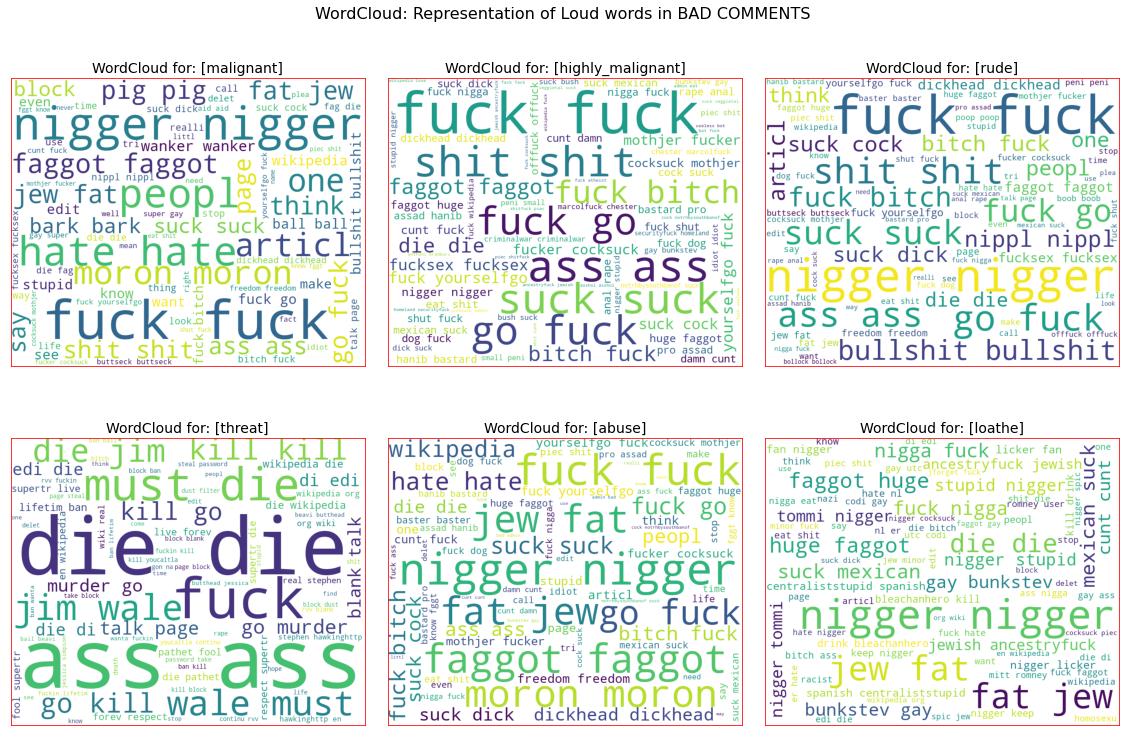

In [26]:
cols = 3
rows = len(output_labels)//cols
if len(output_labels) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(16,rows*cols*1.8))
fig.subplots_adjust(top=0.8, hspace=0.3)

p=1
for i in output_labels:
    word_cloud = WordCloud(height=650,width=800,background_color="white",max_words=80).generate(' '.join(df.comment_text[df[i]==1]))
    ax = fig.add_subplot(rows,cols,p)
    ax.imshow(word_cloud)
    ax.set_title(f"WordCloud for: [{i}]",fontsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
       
    ax.set_xticks([])
    ax.set_yticks([])
    p += 1

fig.suptitle("WordCloud: Representation of Loud words in BAD COMMENTS",fontsize=16)
fig.tight_layout(pad=2)
plt.show()

Remarks:
- From wordcloud of malignant comments, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.
- From wordcloud of highly_malignant comments, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.
- From wordcloud of rude comments, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.
- From wordcloud of threat comments, it is clear that it mostly consists of words like die, must die, kill, murder etc.
- From wordcloud of abuse comments, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.
- From wordcloud of loathe comments, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.

EDA Concluding Remarks are as follows: 
- Starting with univariate analysis, with the help of count plot it was found that dataset is imbalanced with having higher number of records for normal comments than bad comments (including malignant, highly malignant, rude, threat, abuse and loathe). - Also, with the help of distribution plot for comments length, it was found that after cleaning, most of comments length decreases from range 0-1100 to 0-900. Moving further with wordcloud, it was found that malignant comments consists of words like fuck, nigger, moron, hate, suck ect., highly_malignant comments consists of words like ass, fuck, bitch, shit, die, suck, faggot ect., rude comments consists of words like nigger, ass, fuck, suck, bullshit, bitch etc., threat comments consists of words like die, must die, kill, murder etc., abuse comments consists of words like moron, nigger, fat, jew, bitch etc. and loathe comments consists of words like nigga, stupid, nigger, die, gay cunt etc.

### Preparing Data for Model Training & Testing

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.sparse import csr_matrix

In [28]:
#Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df.comment_text).toarray()

#interpreting features
features.shape

(159571, 4000)

In [29]:
#Separating Input and Output Variables
#Input variables
X = features
#Output variables
Y = csr_matrix(df[output_labels]).toarray()
#Checking shapes
print(X.shape)
print(Y.shape)

(159571, 4000)
(159571, 6)


In [32]:
pip install scikit-multilearn

In [33]:
#Training & Testing Model
#importing required libraries
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report
import timeit, sys
import tqdm.notebook as tqdm

In [34]:
#Function to train and test model
def build_models(models,x,y,test_size=0.33,random_state=42):
    #spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    #training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n\n\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [35]:
#### preparing list of models
models = {
    "GaussianNB": {
        "name":GaussianNB(),
    },
    "MultinomialNB":{
        "name":MultinomialNB(),
    },    
}


#taking the one forth of the data for training and testig
half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/2 [00:00<?, ?it/s]


Current Model in Progress: GaussianNB 
Training:  BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.21560957083175086
	Accuracy Score: 0.4729965818458033
              precision    recall  f1-score   support

           0       0.16      0.79      0.26      1281
           1       0.08      0.46      0.13       150
           2       0.11      0.71      0.19       724
           3       0.02      0.25      0.03        44
           4       0.10      0.65      0.17       650
           5       0.04      0.46      0.07       109

   micro avg       0.11      0.70      0.20      2958
   macro avg       0.08      0.55      0.14      2958
weighted avg       0.12      0.70      0.21      2958
 samples avg       0.05      0.07      0.05      2958
Completed in [83.41879670000003 sec.]



Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.0240

### Model Savings now 

In [36]:
df_test = pd.read_csv('test.csv')

In [37]:
#Remove null values
if df_test.isnull().sum()[1] != 0:
    df_test.dropna(inplace=True)

In [38]:
#Drop coulmn id
df_test.drop(columns=['id'],inplace=True)

In [39]:
#Convert comment text to lower case and replace '\n' with single space
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

In [40]:
#Keep only text data i.e., a-z' and remove other data from comment text.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [41]:
#Remove stopwords
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

#Remove punctuations
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

In [42]:
#Apply stemming using SnowballStemmer
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

In [43]:
#Convert text to vectors using TfidfVectorizer
test_features = tfidf.fit_transform(df_test.comment_text).toarray()

In [44]:
#Load saved or serialized model and predict
model_loaded = joblib.load('Malignant_Comments_Classifier.obj')

#Make predictions
predict_test = model_loaded.predict(test_features)

NameError: name 'joblib' is not defined

In [ ]:
#Saving predicted values to csv file
pd.DataFrame(predict_test.toarray()).to_csv('test_output.csv')

Final Remarks: 
- Finished this project with model MultinomialNB which gives the final accuracy score of 90.74% and hamming loss: 2.4% and this can be further improved by training with more specific data! 